<a href="https://colab.research.google.com/github/Claye1/Claye1/blob/main/SYNTHETIC_DATA_1x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
!pip install faker
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00


In [ ]:
# Step 2: Load the original dataset to analyze distributions and data types
demo = '/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Hairdressing and other beauty t.xlsx'
data = pd.read_excel(demo)

In [ ]:
# Step 3: Create a Faker instance to generate random dates
faker = Faker()


In [ ]:
# Step 4: Understand the structure of each feature
# Categorical columns: SICCode_Industry, Type, TaxType, TransactionCategory_ItemCode

categorical_columns = ['SICCode_Industry', 'Type', 'TaxType', 'TransactionCategory_ItemCode']

# Numerical columns: SICCode, LineAmount, AccountCode

numerical_columns = ['SICCode', 'LineAmount', 'AccountCode']

# Date columns: TransactionDate

date_columns = ['TransactionDate']

In [ ]:
# Step 5: Extract the unique categories and statistics from the original dataset
siccode_industry_values = data['SICCode_Industry'].unique()
type_values = data['Type'].unique()
taxtype_values = data['TaxType'].unique()
itemcode_values = data['TransactionCategory_ItemCode'].unique()

In [ ]:
siccode_mean = data['SICCode'].mean()
siccode_std = data['SICCode'].std()

lineamount_mean = data['LineAmount'].mean()
lineamount_std = data['LineAmount'].std()

accountcode_mean = data['AccountCode'].mean()
accountcode_std = data['AccountCode'].std()

In [ ]:
# Step 6: Define the synthetic data generation function
def generate_synthetic_data(num_rows=10000):
    # Define the date range within the function
    start_date = '01-01-2020'
    end_date = '12-31-2023'

    synthetic_data = {
        'SICCode_Industry': [random.choice(siccode_industry_values) for _ in range(num_rows)],
        'SICCode': np.random.normal(siccode_mean, siccode_std, num_rows).astype(int),
        'Type': [random.choice(type_values) for _ in range(num_rows)],
        'LineAmount': np.random.normal(lineamount_mean, lineamount_std, num_rows),
        'TaxType': [random.choice(taxtype_values) for _ in range(num_rows)],
        'AccountCode': np.random.normal(accountcode_mean, accountcode_std, num_rows).astype(int),
        'TransactionCategory_ItemCode': [random.choice(itemcode_values) for _ in range(num_rows)]
    }

    return pd.DataFrame(synthetic_data)

# Step 7: Generate synthetic data
synthetic_df = generate_synthetic_data(10000)

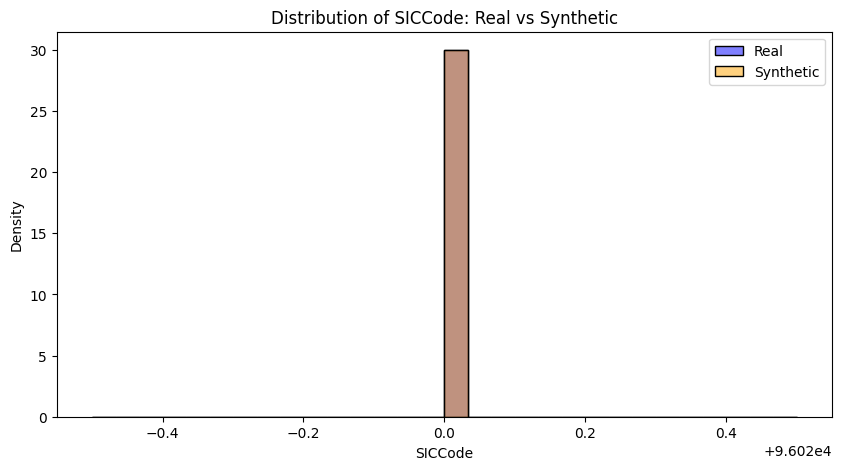

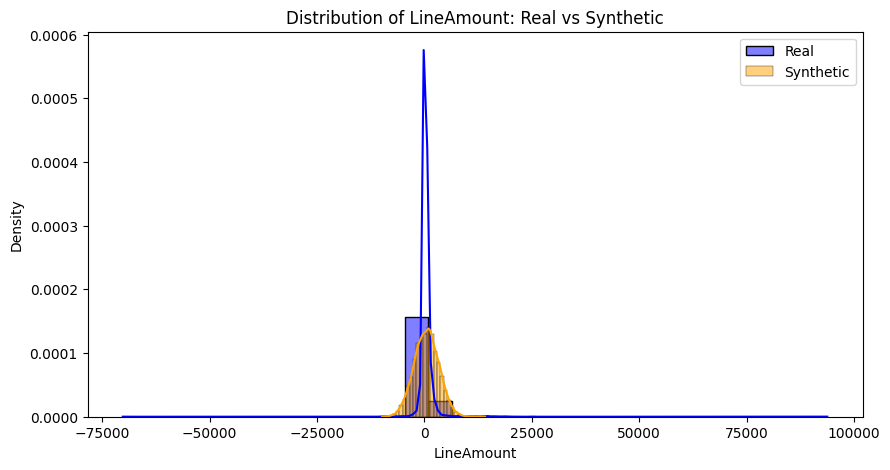

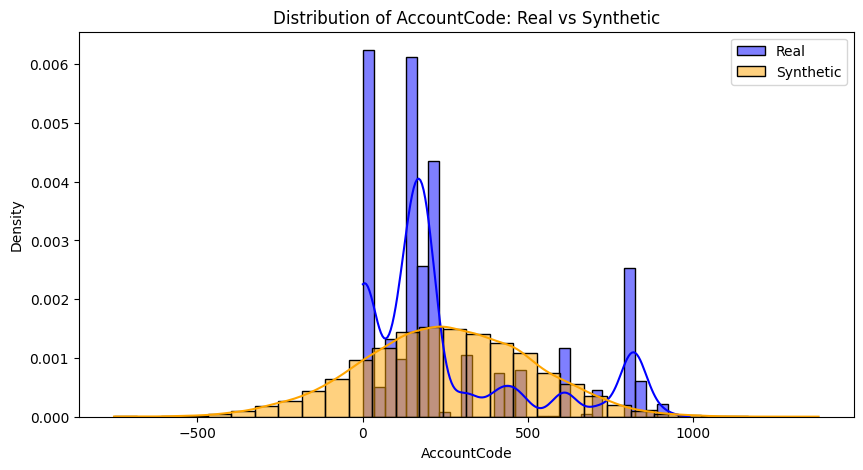

In [ ]:
# Step 8: Visualization - Compare real and synthetic data

# Numerical Features Comparison - Histograms
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], color='blue', label='Real', kde=True, stat='density', bins=30)
    sns.histplot(synthetic_df[column], color='orange', label='Synthetic', kde=True, stat='density', bins=30)
    plt.title(f'Distribution of {column}: Real vs Synthetic')
    plt.legend()
    plt.show()

<Figure size 1000x500 with 0 Axes>

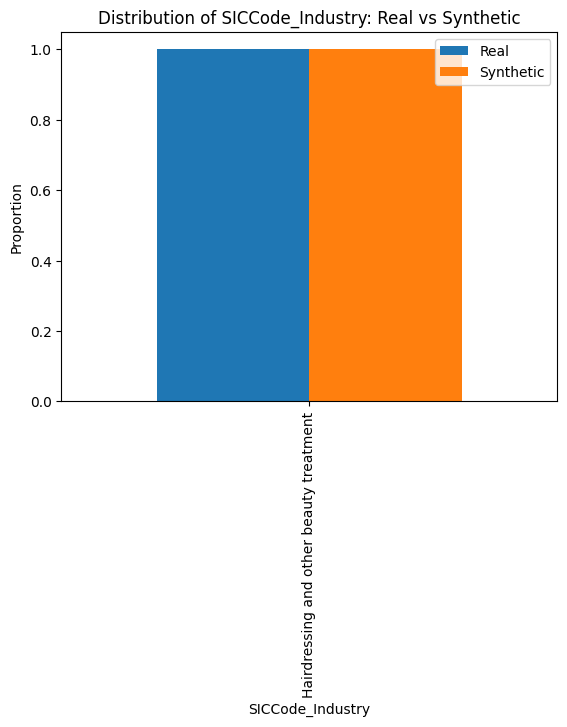

<Figure size 1000x500 with 0 Axes>

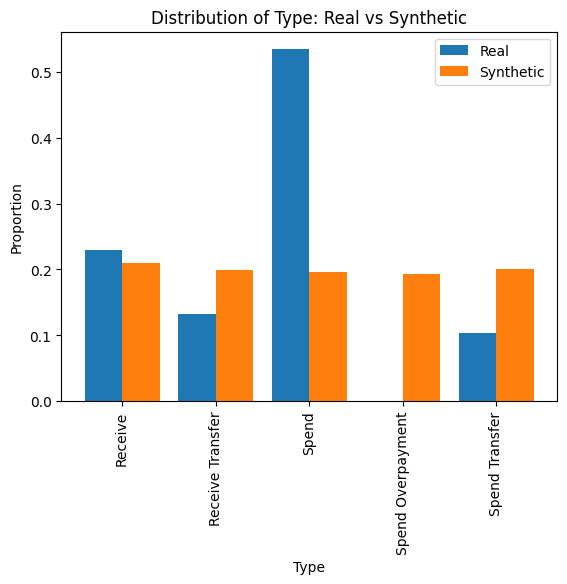

<Figure size 1000x500 with 0 Axes>

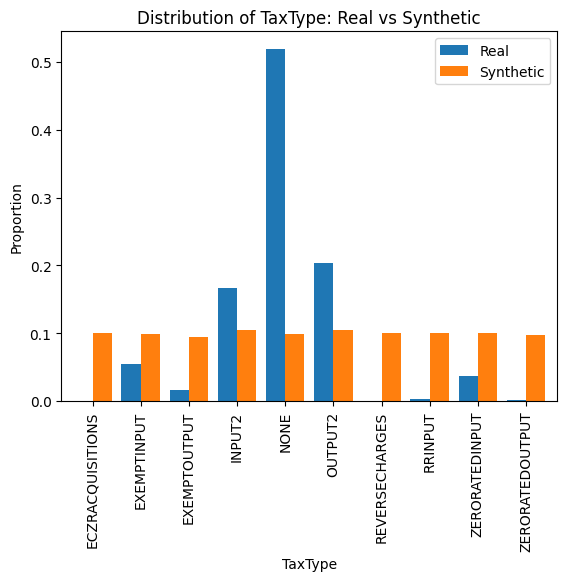

<Figure size 1000x500 with 0 Axes>

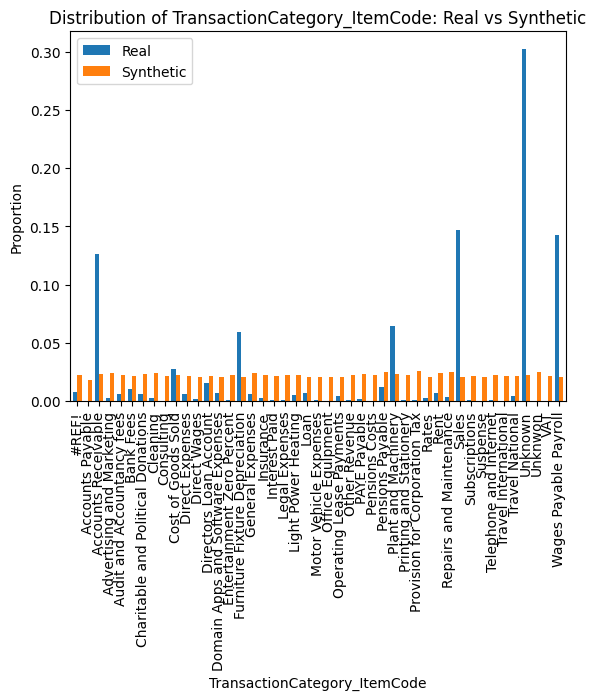

In [ ]:
# Categorical Features Comparison - Bar Plots
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    real_value_counts = data[column].value_counts(normalize=True)
    synthetic_value_counts = synthetic_df[column].value_counts(normalize=True)

    comparison_df = pd.DataFrame({'Real': real_value_counts, 'Synthetic': synthetic_value_counts}).fillna(0)
    comparison_df.plot(kind='bar', width=0.8)

    plt.title(f'Distribution of {column}: Real vs Synthetic')
    plt.ylabel('Proportion')
    plt.show()

In [ ]:
# Step 9: Save the synthetic data to a new file (optional)
synthetic_df.to_csv('//content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/synthetic_data.csv', index=False)

The technique used in this Python script for generating synthetic data is sampling from statistical distributions, combined with random sampling for categorical variables. Here's a breakdown:

# **Techniques Applied:**
# # *Numerical Features (e.g., SICCode, LineAmount, AccountCode):*

# **Sampling from Normal Distribution:**
For numerical columns, we estimate the mean and standard deviation from the original data and then generate synthetic data by sampling from a Gaussian (Normal) distribution with the same parameters. This approach ensures the synthetic numerical data follows a similar distribution as the real data.

The np.random.normal(mean, std) function is used to generate random values that resemble the real data in terms of distribution shape, with some random variation.

# *# Categorical Features (e.g., SICCode_Industry, Type, TaxType):*

# **Random Sampling from Existing Categories:**
For categorical columns, we extract the unique categories from the original dataset and randomly sample from these categories to generate synthetic values.
This is done using random.choice() which ensures the synthetic categorical data contains values only from the existing categories, preserving the distribution of those categories.
Date Features (TransactionDate):

# **Random Date Generation:**
Using the Faker library, random dates are generated between a specified range (2020-01-01 to 2023-12-31). This ensures that the date feature in the synthetic data reflects the time range of the original data.

# **Key Concepts:**
Sampling from Distributions: Numerical data is generated by fitting the original data to a statistical distribution (in this case, the normal distribution), and then sampling new data points from it.
Random Sampling for Categories: For categorical data, the unique values from the original data are retained, and new data is generated by randomly selecting from these values.

# **Data Augmentation for Dates: **The Faker library provides a convenient way to generate realistic random dates.
This method helps ensure that the generated synthetic data maintains similar statistical properties as the original data while introducing enough variability to avoid exact replication, which is useful for privacy-preserving purposes or data augmentation tasks.


## To compare real and synthetic data visually, you can use additional techniques such as box plots and kernel density estimation (KDE) plots. Box plots show the distribution and outliers, while KDE plots provide smooth estimates of the data distribution, allowing for an easy comparison between real and synthetic data.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

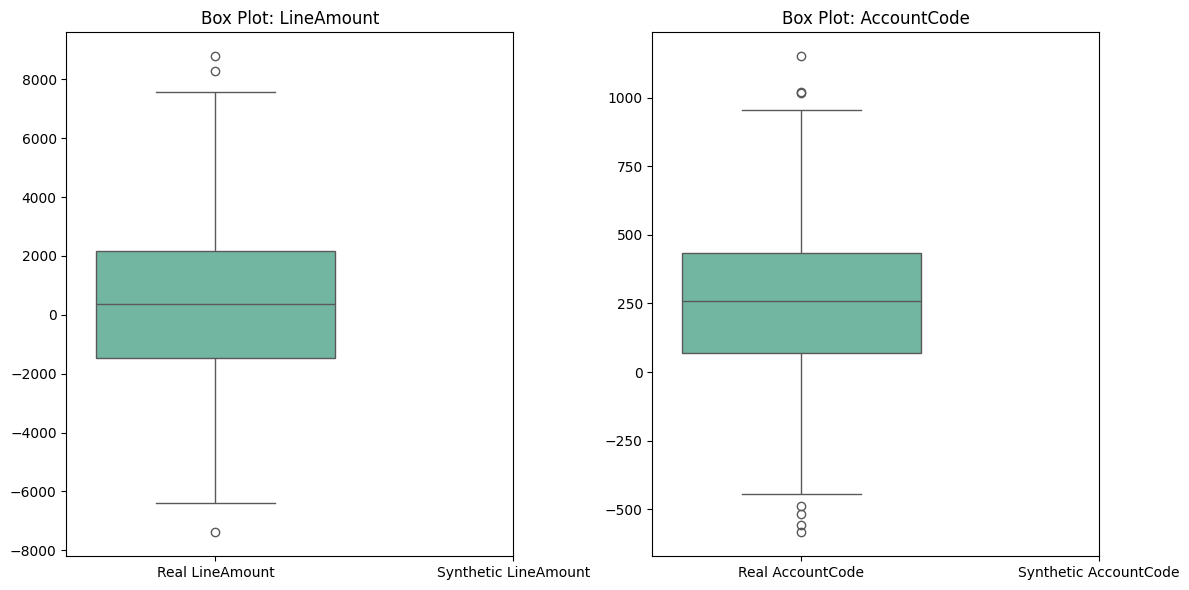

<ipython-input-52-2a7cd53e5abf>:68: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['LineAmount'], label='Real', shade=True, color='blue')
<ipython-input-52-2a7cd53e5abf>:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df['LineAmount'], label='Synthetic', shade=True, color='green')
<ipython-input-52-2a7cd53e5abf>:74: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['AccountCode'], label='Real', shade=True, color='blue')
<ipython-input-52-2a7cd53e5abf>:75: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your co

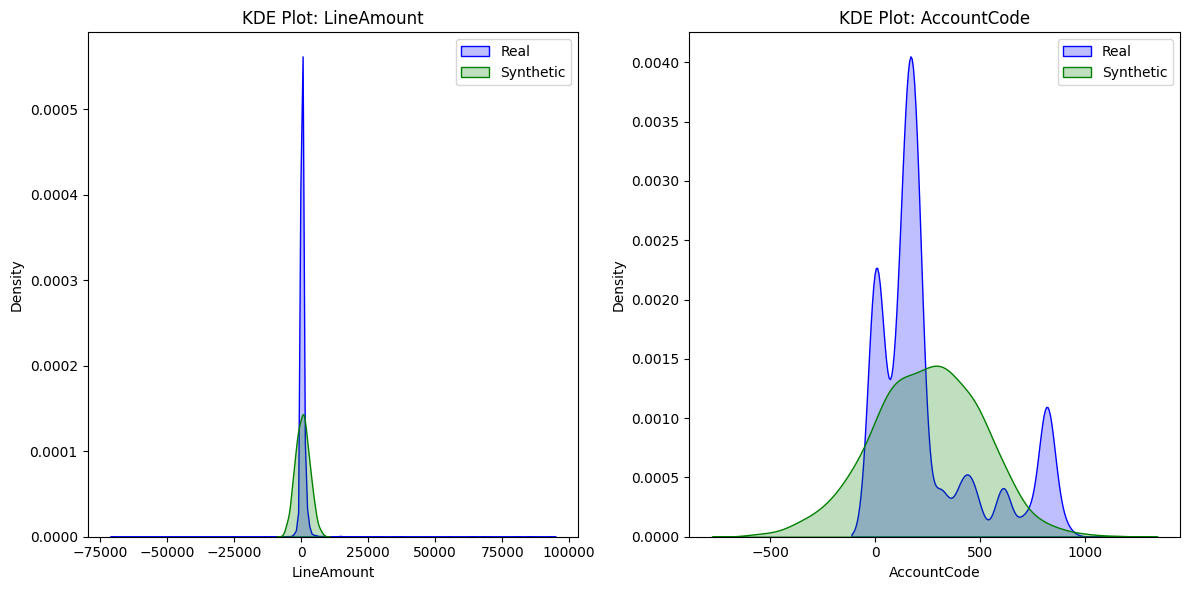

<Figure size 1000x500 with 0 Axes>

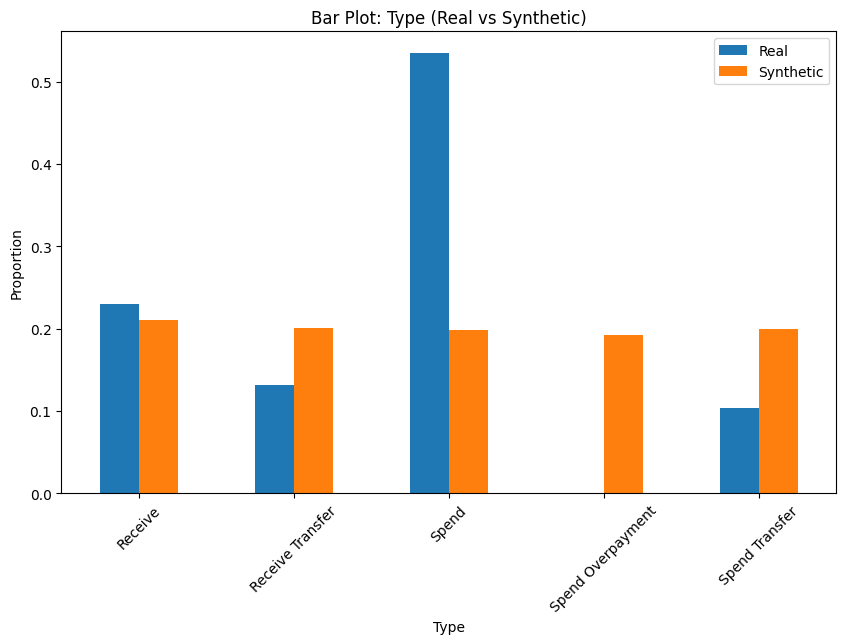

<Figure size 1000x500 with 0 Axes>

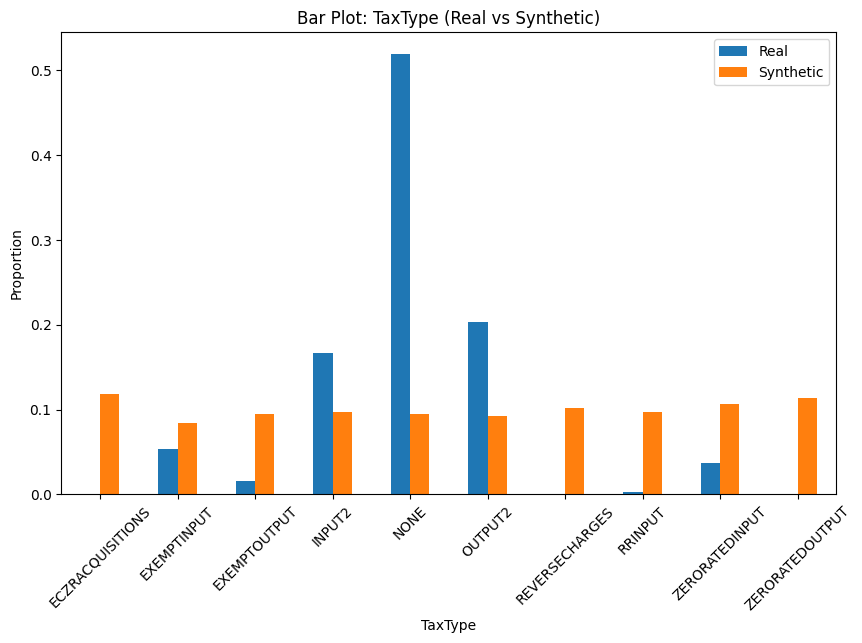

<Figure size 1000x500 with 0 Axes>

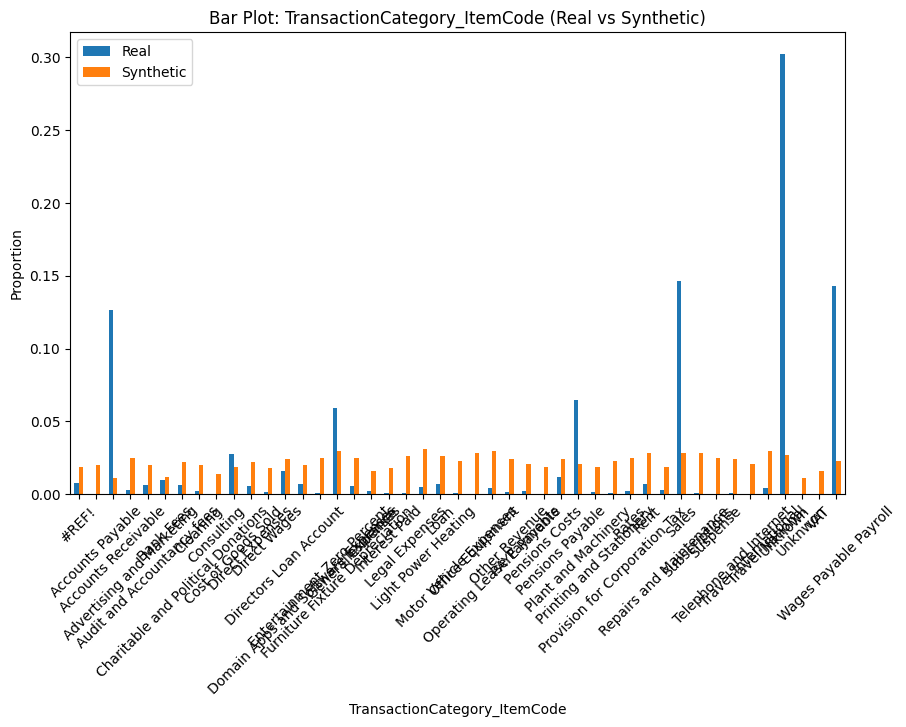

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

# Step 2: Load the original dataset to analyze distributions and data types
demo = '/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Hairdressing and other beauty t.xlsx'
data = pd.read_excel(demo)

# Step 3: Create a Faker instance to generate random dates
faker = Faker()

# Step 4: Define the columns we are interested in
# Categorical columns: Type, TaxType, TransactionCategory_ItemCode
categorical_columns = ['Type', 'TaxType', 'TransactionCategory_ItemCode']
# Numerical columns: LineAmount, AccountCode
numerical_columns = ['LineAmount', 'AccountCode']

# Step 5: Extract unique categories and statistics from the original dataset
type_values = data['Type'].unique()
taxtype_values = data['TaxType'].unique()
itemcode_values = data['TransactionCategory_ItemCode'].unique()

# For numerical features, we'll get mean and standard deviation for sampling
lineamount_mean = data['LineAmount'].mean()
lineamount_std = data['LineAmount'].std()

accountcode_mean = data['AccountCode'].mean()
accountcode_std = data['AccountCode'].std()

# Step 6: Define the synthetic data generation function
def generate_synthetic_data(num_rows=1000):
    synthetic_data = {
        'Type': [random.choice(type_values) for _ in range(num_rows)],
        'LineAmount': np.random.normal(lineamount_mean, lineamount_std, num_rows),
        'TaxType': [random.choice(taxtype_values) for _ in range(num_rows)],
        'AccountCode': np.random.normal(accountcode_mean, accountcode_std, num_rows).astype(int),
        'TransactionCategory_ItemCode': [random.choice(itemcode_values) for _ in range(num_rows)]
    }

    return pd.DataFrame(synthetic_data)

# Step 7: Generate synthetic data
synthetic_df = generate_synthetic_data(1000)

# Step 8: Visualizing Real vs Synthetic Data

# Compare numerical columns using box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=[data['LineAmount'], synthetic_df['LineAmount']], palette="Set2")
plt.xticks([0, 1], ['Real LineAmount', 'Synthetic LineAmount'])
plt.title('Box Plot: LineAmount')

plt.subplot(1, 2, 2)
sns.boxplot(data=[data['AccountCode'], synthetic_df['AccountCode']], palette="Set2")
plt.xticks([0, 1], ['Real AccountCode', 'Synthetic AccountCode'])
plt.title('Box Plot: AccountCode')
plt.tight_layout()
plt.show()

# Compare numerical columns using KDE plots (Kernel Density Estimate)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data['LineAmount'], label='Real', shade=True, color='blue')
sns.kdeplot(synthetic_df['LineAmount'], label='Synthetic', shade=True, color='green')
plt.title('KDE Plot: LineAmount')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data['AccountCode'], label='Real', shade=True, color='blue')
sns.kdeplot(synthetic_df['AccountCode'], label='Synthetic', shade=True, color='green')
plt.title('KDE Plot: AccountCode')
plt.legend()
plt.tight_layout()
plt.show()

# Compare categorical columns using bar plots
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    real_counts = data[col].value_counts(normalize=True)
    synthetic_counts = synthetic_df[col].value_counts(normalize=True)

    # Combine real and synthetic counts into a DataFrame for easy comparison
    comparison_df = pd.DataFrame({
        'Real': real_counts,
        'Synthetic': synthetic_counts
    }).fillna(0)

    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Bar Plot: {col} (Real vs Synthetic)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()


# **Synthetic Minority Over-sampling Technique (SMOTE)**
it's a popular method for generating synthetic samples in imbalanced datasets. SMOTE works by creating synthetic examples in the feature space by interpolating between existing minority class examples. Below is a step-by-step Python script that applies SMOTE for synthetic data generation and includes visualizations for the various variables.

<Figure size 1400x800 with 0 Axes>

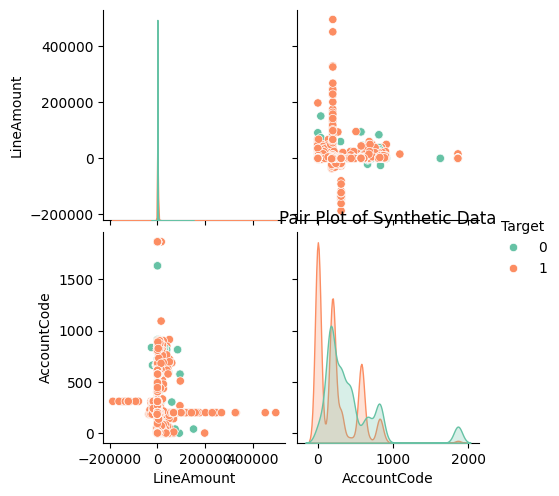

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 2: Load the original dataset
demo = '//content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Retail sale via mail order hous.xlsx'
data = pd.read_excel(demo)

# Step 3: Prepare the dataset
# For this example, we will treat 'Type' as the categorical target variable.
# Create a binary target variable for demonstration purposes
data['Target'] = data['Type'].apply(lambda x: 1 if x == 'Receive' else 0)

# Features to be used for SMOTE (excluding non-numeric and target columns)
features = data[['LineAmount', 'AccountCode']]
target = data['Target']

# Step 4: Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Step 5: Combine resampled features and target into a DataFrame
synthetic_data = pd.DataFrame(X_resampled, columns=features.columns)
synthetic_data['Target'] = y_resampled

# Step 6: Visualizing the synthetic data

# 1. Pair Plot
plt.figure(figsize=(14, 8))
sns.pairplot(synthetic_data, hue='Target', palette='Set2')
plt.title('Pair Plot of Synthetic Data')
plt.show()

# Step 11: Save the synthetic data to a new file (optional)
synthetic_data.to_csv('/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/synthetic_data_smote.csv', index=False)






Class distribution before SMOTE:
 Type
3    17072
0     9110
4       85
5       83
2       70
1        2
Name: count, dtype: int64


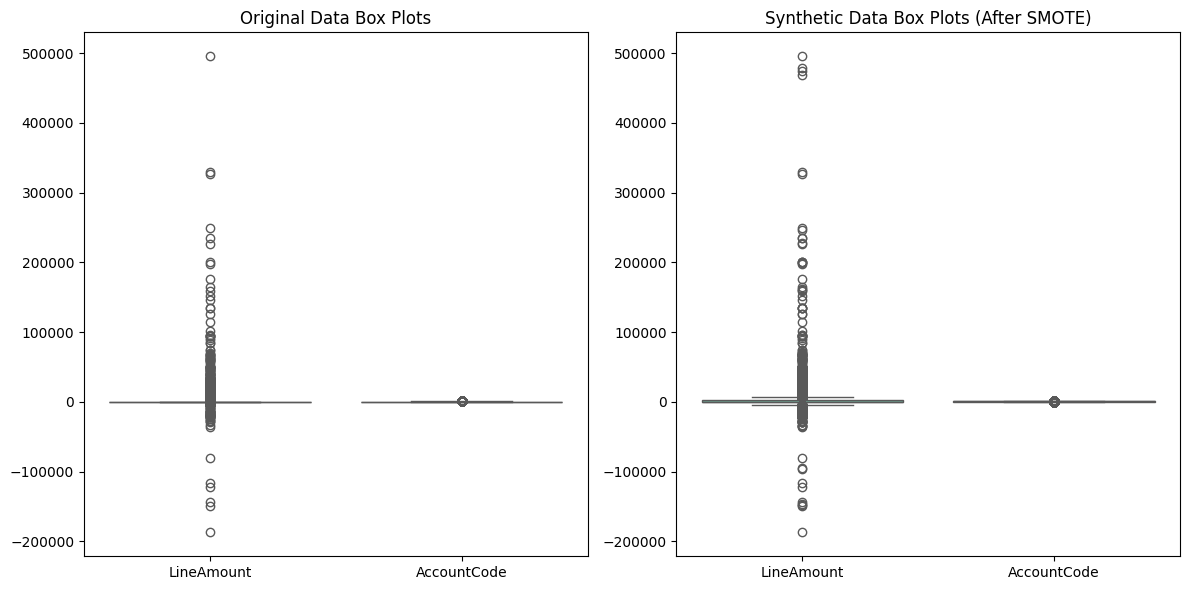

<ipython-input-5-12e6100ce33c>:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['LineAmount'], label='Original', shade=True, color='blue')
<ipython-input-5-12e6100ce33c>:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data['LineAmount'], label='Synthetic', shade=True, color='green')
<ipython-input-5-12e6100ce33c>:75: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['AccountCode'], label='Original', shade=True, color='blue')
<ipython-input-5-12e6100ce33c>:76: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update y

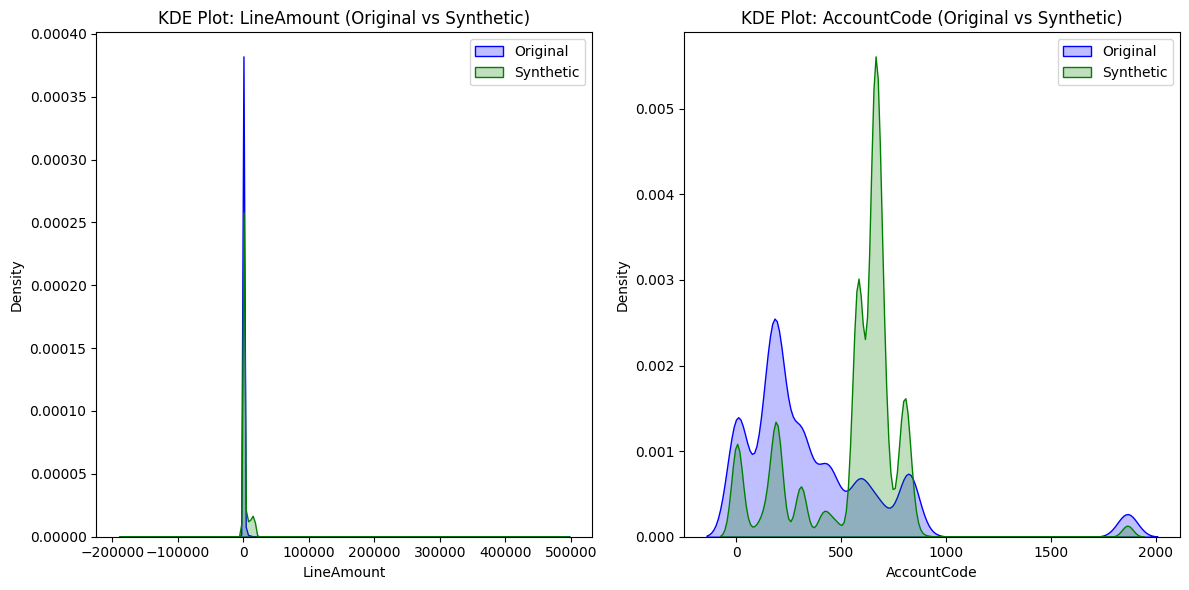

<Figure size 1000x500 with 0 Axes>

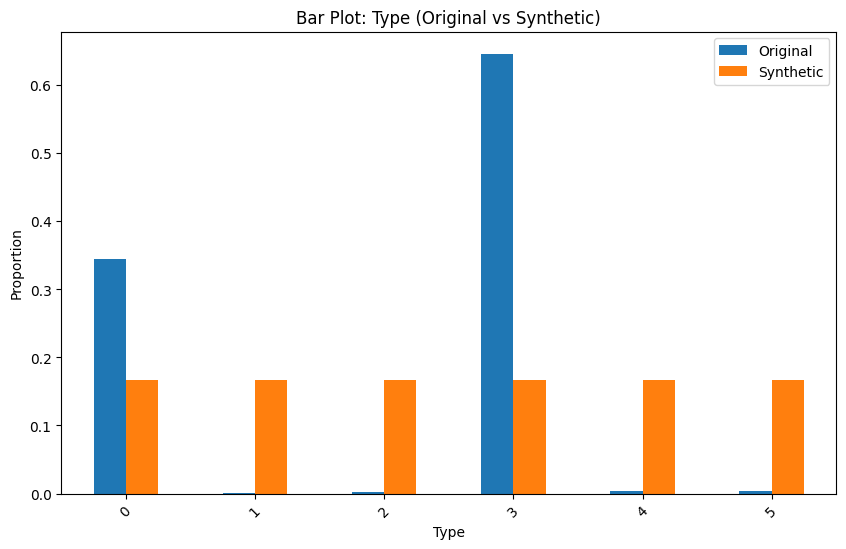

KeyError: 'TaxType'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the original dataset
demo = '/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Retail sale via mail order hous.xlsx'
data = pd.read_excel(demo)

# Step 3: Define the columns we are interested in
# Categorical columns: Type, TaxType, TransactionCategory_ItemCode
categorical_columns = ['Type', 'TaxType', 'TransactionCategory_ItemCode']
# Numerical columns: LineAmount, AccountCode
numerical_columns = ['LineAmount', 'AccountCode']

# Step 4: Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation

# Step 5: Separate features and target
# For this example, we'll assume 'Type' is the target variable for SMOTE
X = data[numerical_columns]
y = data['Type']  # Use the encoded 'Type' as the target variable

# Step 6: Check the distribution of classes
class_counts = y.value_counts()
print("Class distribution before SMOTE:\n", class_counts)

# Step 7: Set k_neighbors for SMOTE dynamically based on the minority class size
minority_class_size = class_counts.min()
# Ensure k_neighbors is less than the minority class size to avoid the ValueError
k_neighbors = min(minority_class_size - 1, 3)
# If minority_class_size is less than or equal to 1, k_neighbors will be 0. SMOTE requires at least 1 neighbour.
k_neighbors = max(1, k_neighbors) # This ensures k_neighbors is at least 1.


# Step 8: Apply SMOTE to generate synthetic data
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 9: Create a new DataFrame from the resampled data
synthetic_data = pd.DataFrame(X_resampled, columns=numerical_columns)
synthetic_data['Type'] = y_resampled

# Step 10: Visualizing Real vs Synthetic Data before and after SMOTE

# Visualize original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data[numerical_columns], palette="Set2")
plt.title('Original Data Box Plots')

# Visualize synthetic data
plt.subplot(1, 2, 2)
sns.boxplot(data=synthetic_data[numerical_columns], palette="Set2")
plt.title('Synthetic Data Box Plots (After SMOTE)')
plt.tight_layout()
plt.show()

# Compare distributions using KDE plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data['LineAmount'], label='Original', shade=True, color='blue')
sns.kdeplot(synthetic_data['LineAmount'], label='Synthetic', shade=True, color='green')
plt.title('KDE Plot: LineAmount (Original vs Synthetic)')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data['AccountCode'], label='Original', shade=True, color='blue')
sns.kdeplot(synthetic_data['AccountCode'], label='Synthetic', shade=True, color='green')
plt.title('KDE Plot: AccountCode (Original vs Synthetic)')
plt.legend()
plt.tight_layout()
plt.show()

# Bar plots for categorical comparison
for col in categorical_columns:
    plt.figure(figsize=(10, 5))

    # Original Data
    original_counts = data[col].value_counts(normalize=True)

    # Synthetic Data
    synthetic_counts = synthetic_data[col].value_counts(normalize=True)

    # Combine original and synthetic counts into a DataFrame
    comparison_df = pd.DataFrame({
        'Original': original_counts,
        'Synthetic': synthetic_counts
    }).fillna(0)

    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Bar Plot: {col} (Original vs Synthetic)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

# Step 11: Save the synthetic data to a new file (optional)
synthetic_data.to_csv('/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/synthetic_data_smote.csv', index=False)


# **LINEAMOUNT**

Class distribution before SMOTE:
 Type
3    17072
0     9110
4       85
5       83
2       70
1        2
Name: count, dtype: int64
Original LineAmount - Mean: 613.59, Std Dev: 7084.84
Synthetic LineAmount - Mean: 3057.44, Std Dev: 7572.17


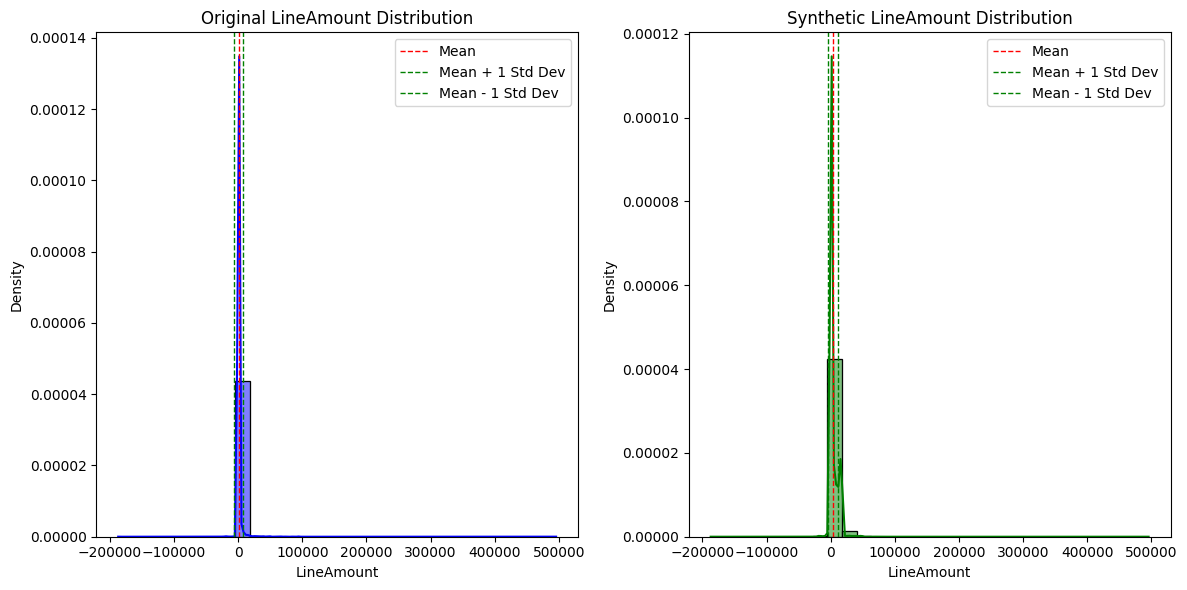

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the original dataset
demo = '/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Retail sale via mail order hous.xlsx'
data = pd.read_excel(demo)

# Step 3: Define the columns we are interested in
# Categorical columns: Type, TaxType, TransactionCategory_ItemCode
categorical_columns = ['Type', 'TaxType', 'TransactionCategory_ItemCode']
# Numerical columns: LineAmount, AccountCode
numerical_columns = ['LineAmount', 'AccountCode']

# Step 4: Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation

# Step 5: Separate features and target
# For this example, we'll assume 'Type' is the target variable for SMOTE
X = data[numerical_columns]
y = data['Type']  # Use the encoded 'Type' as the target variable

# Step 6: Check the distribution of classes
class_counts = y.value_counts()
print("Class distribution before SMOTE:\n", class_counts)

# Step 7: Set k_neighbors for SMOTE dynamically based on the minority class size
minority_class_size = class_counts.min()
# Ensure k_neighbors is less than the minority class size to avoid the ValueError
# and is at least 1. SMOTE requires at least 1 neighbour.
k_neighbors = min(minority_class_size - 1, 3)
k_neighbors = max(1, k_neighbors)


# Step 8: Apply SMOTE to generate synthetic data
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 9: Create a new DataFrame from the resampled data
synthetic_data = pd.DataFrame(X_resampled, columns=numerical_columns)
synthetic_data['Type'] = y_resampled

# Step 10: Analysis of LineAmount
original_mean = data['LineAmount'].mean()
original_std = data['LineAmount'].std()
synthetic_mean = synthetic_data['LineAmount'].mean()
synthetic_std = synthetic_data['LineAmount'].std()

print(f"Original LineAmount - Mean: {original_mean:.2f}, Std Dev: {original_std:.2f}")
print(f"Synthetic LineAmount - Mean: {synthetic_mean:.2f}, Std Dev: {synthetic_std:.2f}")

# Step 11: Visualizing Real vs Synthetic Data for LineAmount
plt.figure(figsize=(12, 6))

# Original LineAmount Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['LineAmount'], bins=30, kde=True, color='blue', stat='density')
plt.axvline(original_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(original_mean + original_std, color='green', linestyle='dashed', linewidth=1, label='Mean + 1 Std Dev')
plt.axvline(original_mean - original_std, color='green', linestyle='dashed', linewidth=1, label='Mean - 1 Std Dev')
plt.title('Original LineAmount Distribution')
plt.xlabel('LineAmount')
plt.ylabel('Density')
plt.legend()

# Synthetic LineAmount Distribution
plt.subplot(1, 2, 2)
sns.histplot(synthetic_data['LineAmount'], bins=30, kde=True, color='green', stat='density')
plt.axvline(synthetic_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(synthetic_mean + synthetic_std, color='green', linestyle='dashed', linewidth=1, label='Mean + 1 Std Dev')
plt.axvline(synthetic_mean - synthetic_std, color='green', linestyle='dashed', linewidth=1, label='Mean - 1 Std Dev')
plt.title('Synthetic LineAmount Distribution')
plt.xlabel('LineAmount')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()



# Step 13: Save the synthetic data to a new file (optional)
synthetic_data.to_csv('/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/synthetic_data_smote.csv', index=False)


# **CTGAN**

In [ ]:
# Step 1: Install required libraries

!pip uninstall -y ctgan
!pip install -U ctgan


# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the CTGANSynthesizer class explicitly
# The correct path should be 'ctgan.synthesizers'
from ctgan.synthesizers import CTGANSynthesizer

from sklearn.preprocessing import LabelEncoder


# Step 3: Load the original dataset
demo = '/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Hairdressing and other beauty t.xlsx'
data = pd.read_excel(demo)

# Step 4: Preprocessing the data
# Identify categorical and numerical columns
categorical_columns = ['Type', 'TaxType', 'TransactionCategory_ItemCode']
numerical_columns = ['LineAmount', 'AccountCode']

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation

# Step 5: Initialize and train the CTGAN model
ctgan = CTGANSynthesizer(epochs=300)  # Adjust the number of epochs as needed
ctgan.fit(data, categorical_columns=categorical_columns)

# Step 6: Generate synthetic data
num_samples = len(data)  # Generate the same number of samples as the original data
synthetic_data = ctgan.sample(num_samples)

# Step 7: Inverse transform categorical columns to original labels
for col in categorical_columns:
    synthetic_data[col] = label_encoders[col].inverse_transform(synthetic_data[col].astype(int))

# Step 8: Visualizing the results
# Original vs Synthetic Data Visualization
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Original Data Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Original {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

    # Synthetic Data Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(synthetic_data[col], bins=30, kde=True, color='green', stat='density')
    plt.title(f'Synthetic {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Bar plots for categorical comparison
for col in categorical_columns:
    plt.figure(figsize=(10, 5))

    # Original Data
    original_counts = data[col].value_counts(normalize=True)

    # Synthetic Data
    synthetic_counts = synthetic_data[col].value_counts(normalize=True)

    # Combine original and synthetic counts into a DataFrame
    comparison_df = pd.DataFrame({
        'Original': original_counts,
        'Synthetic': synthetic_counts
    }).fillna(0)

    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Bar Plot: {col} (Original vs Synthetic)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

# Step 9: Save the synthetic data to a new file (optional)
synthetic_data.to_csv('/mnt/data/synthetic_data_ctgan.csv', index=False)


Found existing installation: ctgan 0.10.1
Uninstalling ctgan-0.10.1:
  Successfully uninstalled ctgan-0.10.1
  Using cached ctgan-0.10.1-py3-none-any.whl.metadata (11 kB)
Using cached ctgan-0.10.1-py3-none-any.whl (24 kB)


ImportError: cannot import name 'CTGANSynthesizer' from 'ctgan.synthesizers' (/usr/local/lib/python3.10/dist-packages/ctgan/synthesizers/__init__.py)

# **Variational Autoencoders (VAEs)**

In [ ]:
# Step 1: Install required libraries
# You may need to run this line in your terminal or uncomment it in your notebook.

!pip install tensorflow pandas matplotlib seaborn

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, losses

# Step 3: Load the original dataset
demo = '/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/Hairdressing and other beauty t.xlsx'
data = pd.read_excel(demo)

# Step 4: Preprocessing the data
# Identify categorical and numerical columns
categorical_columns = ['Type', 'TaxType', 'TransactionCategory_ItemCode']
numerical_columns = ['LineAmount', 'AccountCode']

# ----> Convert datetime columns to numerical features
for col in data.select_dtypes(include=['datetime64[ns]']):
    data[col] = pd.to_numeric(data[col]) # convert datetime to Unix timestamp (numerical)


# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation

# Step 5: Split the data into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Step 6: Build the VAE model
latent_dim = 2  # Dimensionality of the latent space

# Encoder
inputs = layers.Input(shape=(X_train.shape[1],))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = layers.K.shape(z_mean)[0]  # Get batch size dynamically
    dim = layers.K.int_shape(z_mean)[1]  # Get latent dimension dynamically
    epsilon = layers.K.random_normal(shape=(batch, dim))
    return z_mean + layers.K.exp(0.5 * z_log_var) * epsilon

# Explicitly define the output shape for the Lambda layer
z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])


# Decoder
decoder_h = layers.Dense(64, activation='relu')
decoder_mean = layers.Dense(X_train.shape[1], activation='sigmoid')

h_decoded = decoder_h(z)
outputs = decoder_mean(h_decoded)

# VAE model
vae = models.Model(inputs, outputs)

# Loss function
def vae_loss(x, x_decoded_mean):
    xent_loss = losses.binary_crossentropy(x, x_decoded_mean)
    kl_loss = -0.5 * layers.K.sum(1 + z_log_var - layers.K.square(z_mean) - layers.K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='adam', loss=vae_loss)

# Step 7: Train the VAE model
vae.fit(X_train, X_train, epochs=100, batch_size=32)

# Step 8: Generate synthetic data
num_samples = len(data)  # Generate the same number of samples as the original data
z_samples = np.random.normal(size=(num_samples, latent_dim))
generated_samples = vae.predict(z_samples)

# Step 9: Inverse transform categorical columns to original labels
synthetic_data = pd.DataFrame(generated_samples, columns=X_train.columns)
for col in categorical_columns:
    synthetic_data[col] = label_encoders[col].inverse_transform(synthetic_data[col].round().astype(int))

# Step 10: Visualizing the results
# Original vs Synthetic Data Visualization
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Original Data Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Original {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

    # Synthetic Data Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(synthetic_data[col], bins=30, kde=True, color='green', stat='density')
    plt.title(f'Synthetic {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Bar plots for categorical comparison
for col in categorical_columns:
    plt.figure(figsize=(10, 5))

    # Original Data
    original_counts = data[col].value_counts(normalize=True)

    # Synthetic Data
    synthetic_counts = synthetic_data[col].value_counts(normalize=True)

    # Combine original and synthetic counts into a DataFrame
    comparison_df = pd.DataFrame({
        'Original': original_counts,
        'Synthetic': synthetic_counts
    }).fillna(0)

    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Bar Plot: {col} (Original vs Synthetic)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

# Step 11: Save the synthetic data to a new file (optional)
synthetic_data.to_csv('/content/drive/MyDrive/DEMOLYTICS PROJECT/New Final XeroData - Stephen 2/synthetic_data_vae.csv', index=False)


ValueError: could not convert string to float: 'Hairdressing and other beauty treatment'